# Option pricing using Black-Scholes model and Monte Carlo simulations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [4,3]
mpl.rcParams['lines.linewidth'] = 2

import sys
sys.path.append('..')
import pyQuafi as qf
import pyQuafi.models.options as options

## Introduction

In this notebook, we will compute the price of a call option using the Black-Scholes model and Monte Carlo simulations. For this, we will use the python package $\texttt{pyQuafi}$ in addition to standard python packages ($\texttt{numpy}$ and $\texttt{matplotlib}$).

### Black-Scholes model

The Black-Scholes model describes how the price of an option varies with the price of the underlying asset. It relies on the following assumptions:  
1. The dynamics of the price $S$ of the underlying is governed by a geometric Brownian motion, _viz.,_ 
\begin{equation*}
dS = \mu S dt + \sigma S dW
\end{equation*}
where $\mu$ is the average growth of the underlying, $\sigma$ is the volatility and $W$ is a Wiener process.  
2. The risk-free interest rate is constant over the period of time considered. 
3. The underlying pays no dividends.    
4. There are no arbitrage opportunities.  
5. Markets are frictionless (no transaction costs).

Under these assumptions, the price of a call option $C(t)$ with payoff $\max\{{S(T)}-K,0\}$ at time $t$ is given by
\begin{equation*}
C(t) = S(t)N(d_-) - K\text{e}^{-r(T-t)}N(d_+);\qquad d_\pm = \frac{1}{\sigma\sqrt{T-t}}\left[\log\left(\frac{S(t)}{K}\right)+\left(r\pm\frac{\sigma^2}{2}\right)(T-t)\right]
\end{equation*}
where $N(x)\equiv\frac{1}{\sqrt{2\pi}}\int_{-\infty}^x \text{e}^{-k^2/2}dk$ is the cumulative distribution function of a standard normal distribution, $r$ is the risk-free interest rate, $K$ is the strike price and $T$ is the time to maturity.

__Parameters for simulation__  

$S_0$: price of underlying at $t=0$  
$K$: strike price  
$T$: time to maturity  
$t$: elapsed time  
$r$: risk-free interest rate  
$\sigma$: volatility  



### Monte Carlo method

Using the Monte Carlo method, we can generate various possible trajectories that the price of the underlying $S$ can take. To obtain sample realizations, we assume that $S(t)$ follows a geometric Brownian motion so that
\begin{equation*}
S(t) = S(0)\exp\left\{(\mu-\sigma^2/2)t+\sigma\sqrt{t}W\right\}.
\end{equation*}
Here, $W$ is drawn from a standard normal distribution. For a given realization, we compute the (call) option price using $C=\text{present value of }\max\left\{S(T)-K,0\right\} = \max\left\{S(T)-K,0\right\}\text{e}^{-r(T-t)}$.  

__Parameters for simulation__  

runs: number of Monte Carlo runs  
All parameters required for simulating Black-Scholes (see above)  

## Effect of number of Monte Carlo runs on option price

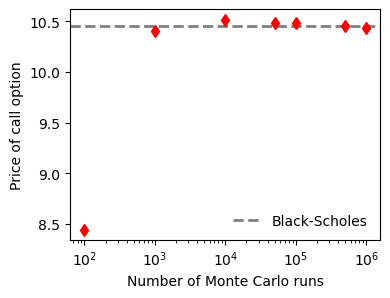

In [10]:
# -- Monte Carlo --
# Parameters
S0 = 100
K = 100
T = 1
t = 0
r = 0.05
sigma = 0.2
runs = [100,1000,10000,50000,100000,500000,1000000]
price_mc = np.zeros(len(runs))
for i,run in enumerate(runs):
    mc = options.MonteCarlo(S0, K, T, t, r, r, sigma, run)
    price_mc[i] = mc.call()

# -- Black-Scholes (benchmark) --
# Parameters
bs = options.BlackScholes(S0, K, T, t, r, sigma)
price_bs = bs.call()

plt.plot(runs,price_mc,'rd')
plt.axhline(y=price_bs,ls='--',color='grey',label='Black-Scholes',zorder=0)
plt.xscale('log')
plt.xlabel('Number of Monte Carlo runs')
plt.ylabel('Price of call option')
plt.legend(frameon=0)

More the number of runs, better the convergence. Henceforth, we will run Monte Carlo simulations $10^5$ times to ensure sufficient sampling.

## Option price as function of interest rate

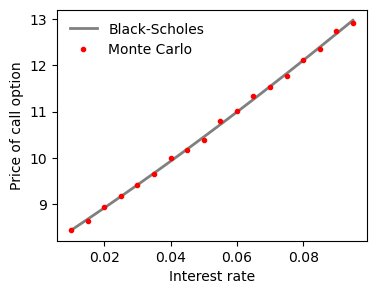

In [51]:
rates = np.arange(0.01,0.1,0.005) # list of interest rates

# -- Black-Scholes --
# Parameters
S0 = 100
K = 100
T = 1
t = 0
sigma = 0.2

price_bs = np.zeros(len(rates))
for i,r in enumerate(rates):
    bs = options.BlackScholes(S0, K, T, t, r, sigma)
    price_bs[i] = bs.call()

# -- Monte Carlo --
# Parameters
runs = 100000

price_mc = np.zeros(len(rates))
for i,r in enumerate(rates):
    mc = options.MonteCarlo(S0, K, T, t, r, r, sigma, runs)
    price_mc[i] = mc.call()

plt.plot(rates,price_bs,'grey',label='Black-Scholes')
plt.plot(rates,price_mc,'r.',label='Monte Carlo')
plt.xlabel('Interest rate')
plt.ylabel('Price of call option')
plt.legend(frameon=0)

## Option price as function of volatility

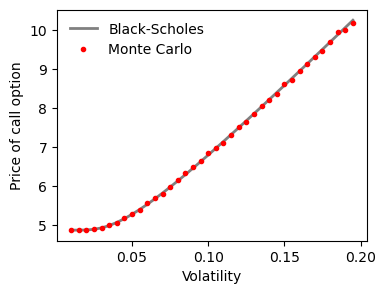

In [52]:
sigmas = np.arange(0.01,0.2,0.005) # list of volatilities

# -- Black-Scholes --
# Parameters
S0 = 100
K = 100
T = 1
t = 0
r = 0.05

price_bs = np.zeros(len(sigmas))
for i,sigma in enumerate(sigmas):
    bs = options.BlackScholes(S0, K, T, t, r, sigma)
    price_bs[i] = bs.call()

# -- Monte Carlo --
# Parameters
runs = 100000

price_mc = np.zeros(len(sigmas))
for i,sigma in enumerate(sigmas):
    mc = options.MonteCarlo(S0, K, T, t, r, r, sigma, runs)
    price_mc[i] = mc.call()

plt.plot(sigmas,price_bs,'grey',label='Black-Scholes')
plt.plot(sigmas,price_mc,'r.',label='Monte Carlo')
plt.xlabel('Volatility')
plt.ylabel('Price of call option')
plt.legend(frameon=0)

## Option price as function of strike price

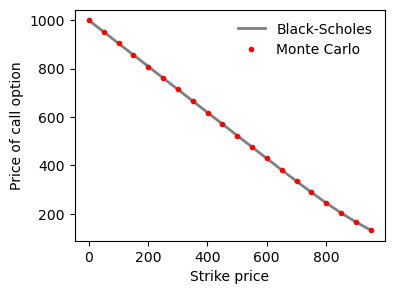

In [13]:
Ks = np.arange(1,1000,50) # list of strike prices

# -- Black-Scholes --
# Parameters
S0 = 1000
K = 100
T = 1
t = 0
r = 0.05

price_bs = np.zeros(len(Ks))
for i,K in enumerate(Ks):
    bs = options.BlackScholes(S0, K, T, t, r, sigma)
    price_bs[i] = bs.call()

# -- Monte Carlo --
# Parameters
runs = 100000

price_mc = np.zeros(len(Ks))
for i,K in enumerate(Ks):
    mc = options.MonteCarlo(S0, K, T, t, r, r, sigma, runs)
    price_mc[i] = mc.call()

plt.plot(Ks,price_bs,'grey',label='Black-Scholes')
plt.plot(Ks,price_mc,'r.',label='Monte Carlo')
plt.xlabel('Strike price')
plt.ylabel('Price of call option')
plt.legend(frameon=0)

## Option price as function of elapsed time

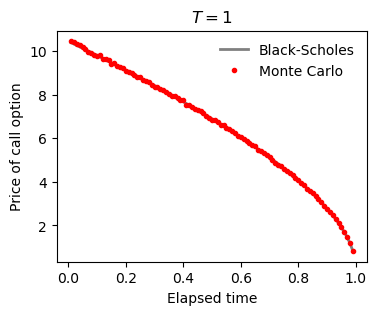

In [60]:
times = np.arange(0.01,0.999,0.01) # list of elapsed time

# -- Black-Scholes --
# Parameters
S0 = 100
K = 100
T = 1
r = 0.05
sigma = 0.2

price_bs = np.zeros(len(times))
for i,t in enumerate(times):
    bs = options.BlackScholes(S0, K, T, t, r, sigma)
    price_bs[i] = bs.call()

# -- Monte Carlo --
# Parameters
runs = 100000

price_mc = np.zeros(len(times))
for i,t in enumerate(times):
    mc = options.MonteCarlo(S0, K, T, t, r, r, sigma, runs)
    price_mc[i] = mc.call()

plt.plot(times,price_bs,'grey',label='Black-Scholes')
plt.plot(times,price_mc,'r.',label='Monte Carlo')
plt.xlabel('Elapsed time')
plt.ylabel('Price of call option')
plt.title('$T=1$')
plt.legend(frameon=0)